In [1]:
#importing the libraries
import numpy as np
import pandas as pd

In [2]:
#importing the dataset
bank_note_df = pd.read_csv("Bank_note_dataset.csv", names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [3]:
#viewing first 5 rows
bank_note_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.4621,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


In [4]:
#shape of the dataset
bank_note_df.shape

(1372, 5)

In [5]:
#information regarding the dataset
bank_note_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   object 
 2   curtosis  1372 non-null   object 
 3   entropy   1372 non-null   object 
 4   class     1372 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 53.7+ KB


In [6]:
#changing the type of columns from string to float
bank_note_df['skewness'] = pd.to_numeric(bank_note_df['skewness'],errors='coerce')
bank_note_df['curtosis'] = pd.to_numeric(bank_note_df['curtosis'],errors='coerce')
bank_note_df['entropy'] = pd.to_numeric(bank_note_df['entropy'],errors='coerce')

In [7]:
#information regarding dataset
bank_note_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1358 non-null   float64
 2   curtosis  1351 non-null   float64
 3   entropy   1368 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
#description of dataset
bank_note_df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1358.000000,1351.000000,1368.000000,1372.000000
mean,0.433735,1.935223,1.379224,-1.187132,0.444606
std,2.842763,5.871058,4.288765,2.096997,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.714400,-1.633850,-2.413450,0.000000
50%,0.496180,2.334150,0.616630,-0.586000,0.000000
75%,2.821475,6.820850,3.172150,0.395457,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
#value counts of the class column
bank_note_df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

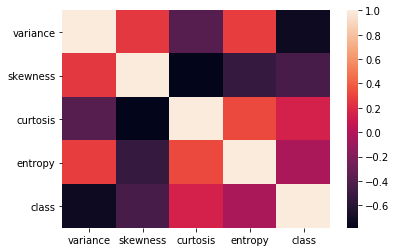

In [10]:
#checking the correlation between the columns of dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(bank_note_df.corr())

In [11]:
#fillinf the null values with the mean of the column
bank_note_df['skewness'].fillna(bank_note_df['skewness'].mean(), inplace=True)
bank_note_df['curtosis'].fillna(bank_note_df['curtosis'].mean(), inplace=True)
bank_note_df['entropy'].fillna(bank_note_df['entropy'].mean(), inplace=True)

In [12]:
#information regarding the dataset
bank_note_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
#viewing the first 5 rows of the dataset
bank_note_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,1.935223,-2.8073,-0.44699,0
1,4.54590,8.167400,-2.4586,-1.46210,0
2,3.86600,-2.638300,1.9242,0.10645,0
3,3.45660,9.522800,-4.0112,-3.59440,0
4,0.32924,-4.455200,4.5718,-0.98880,0


In [14]:
#importing the classifier libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
#defining features and target variable
y = bank_note_df['class']
X = bank_note_df.drop(columns = ['class'])

In [16]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
#shape of train test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


In [18]:
#fitting, predicting and checking the accuracy of the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, Y_pred)

0.9737609329446064

In [19]:
#importing ID3 estimator
from id3 import Id3Estimator
from id3 import export_graphviz

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [20]:
#fitting the ID3 model
estimator = Id3Estimator()
estimator.fit(X_train, y_train)
export_graphviz(estimator.tree_, 'tree.dot', bank_note_df.columns)

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [21]:
#importing libraries for ID3, C4.5 and CART model
from chefboost import Chefboost as chef

In [22]:
bank_note_df["Decision"] = bank_note_df["class"]
bank_note_df = bank_note_df.drop("class", axis=1)

In [23]:
#fitting the C4.5 model
config = {'algorithm': 'C4.5'}
model = chef.fit(bank_note_df, config)

Regression  tree is going to be built...
MAE:  0.11443148688046648
RMSE:  0.33827723376021995
Mean:  0.4446064139941691
MAE / Mean:  25.737704918032787 %
RMSE / Mean:  76.08464995393798 %
finished in  7.5279881954193115  seconds


In [24]:
#fitting ID3 model
config = {'algorithm': 'ID3'}
model = chef.fit(bank_note_df, config)

Regression  tree is going to be built...
MAE:  0.11443148688046648
RMSE:  0.33827723376021995
Mean:  0.4446064139941691
MAE / Mean:  25.737704918032787 %
RMSE / Mean:  76.08464995393798 %
finished in  0.9148924350738525  seconds


In [25]:
#fitting CART model
config = {'algorithm': 'CART'}
model = chef.fit(bank_note_df, config)

Regression  tree is going to be built...
MAE:  0.11443148688046648
RMSE:  0.33827723376021995
Mean:  0.4446064139941691
MAE / Mean:  25.737704918032787 %
RMSE / Mean:  76.08464995393798 %
finished in  0.8036215305328369  seconds
